In [1]:
import pandas as pd
import os
import sys

parent = os.path.abspath(os.path.join('..'))
sys.path.append(parent)

from utils import misc

In [2]:
attr_path = '/storage2/datasets/celeba-hq/CelebAMask-HQ-attribute-anno.txt'
with open(attr_path) as f:
    f.readline()
    df = pd.read_csv(f, delim_whitespace=True)

df = df.replace(-1, 0)
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '/home/kligvasser/datasets/celeba-hq/CelebAMask-HQ-attribute-anno.txt'

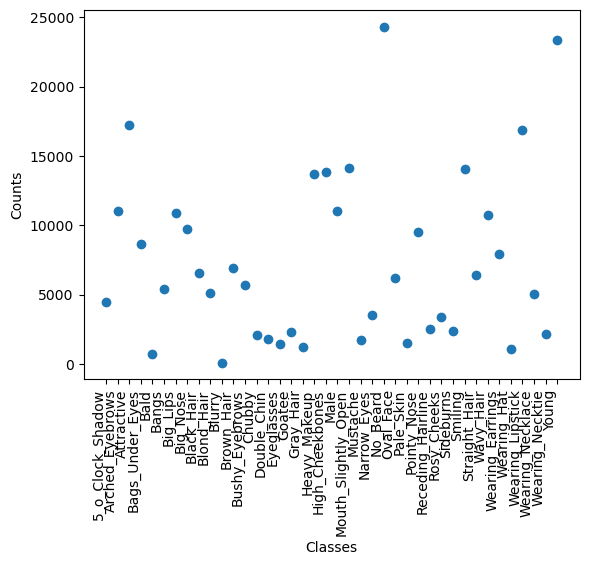

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

cls_list = list(df.columns.values)
counts = dict()
for cls in cls_list:
    counts[cls] = df[cls].values.sum()

x = list(counts.keys())
y = list(counts.values())

plt.scatter(x, y)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

def split_dataframe(df, test_size=0.1, random_state=42):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)
    return train_df, test_df


train_df, test_df = split_dataframe(df, 0.1)

In [5]:
misc.save_df(train_df, '/storage2/datasets/celeba-hq/attributes-train.pkl')
misc.save_df(test_df, '/storage2/datasets/celeba-hq/attributes-test.pkl')

In [ ]:
d1 = misc.load_df('/home/kligvasser/datasets/celeba-hq/attributes-train.pkl')